In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
data=pd.read_csv(r"../input/hardfakevsrealfaces/data.csv")
data.head()

,images_id,label
0,real_1,real
1,real_10,real
2,real_100,real
3,real_101,real
4,real_102,real


In [3]:
height, width=128, 128
X=np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img=load_img(r"../input/hardfakevsrealfaces/{}/{}.jpg".format(data.loc[i, 'label'], \
                  data.loc[i, 'images_id']), target_size=(height, width))
    X[i]=img_to_array(img)
X.shape

(1289, 128, 128, 3)

In [4]:
def changeLabels(x):
    return labels[x]

labels=data.label.unique()
labels={labels[i]:i for i in range(labels.size)}
y=data.label.apply(changeLabels)
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y=to_categorical(y, len(labels))
y=y.astype(int)
y[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=8)
X_train.shape, y_train.shape

((1031, 128, 128, 3), (1031, 2))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [10]:
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(height, width, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(2, activation='softmax'))

In [11]:
epochs=8
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
model.summary()

Epoch 1/8
26/26 [==============================] - 7s 215ms/step - loss: 4.1298 - accuracy: 0.5959 - val_loss: 0.4716 - val_accuracy: 0.7585
Epoch 2/8
26/26 [==============================] - 5s 192ms/step - loss: 0.5333 - accuracy: 0.7464 - val_loss: 0.3346 - val_accuracy: 0.8889
Epoch 3/8
26/26 [==============================] - 5s 194ms/step - loss: 0.3369 - accuracy: 0.8629 - val_loss: 0.1801 - val_accuracy: 0.9420
Epoch 4/8
26/26 [==============================] - 5s 192ms/step - loss: 0.1850 - accuracy: 0.9333 - val_loss: 0.1177 - val_accuracy: 0.9614
Epoch 5/8
26/26 [==============================] - 6s 242ms/step - loss: 0.1233 - accuracy: 0.9733 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 6/8
26/26 [==============================] - 5s 196ms/step - loss: 0.0905 - accuracy: 0.9684 - val_loss: 0.0580 - val_accuracy: 0.9710
Epoch 7/8
26/26 [==============================] - 5s 197ms/step - loss: 0.0531 - accuracy: 0.9806 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 8/8
26/

Text(0.5, 1.0, 'Training and validation loss')

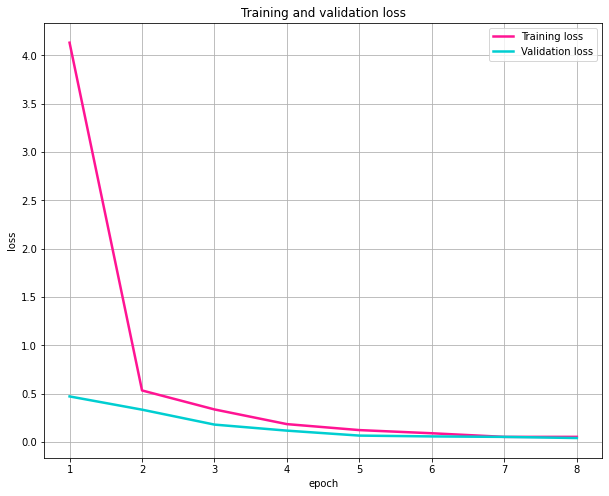

In [12]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(1, epochs+1))
plot.figure(figsize=(10, 8))
sb.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

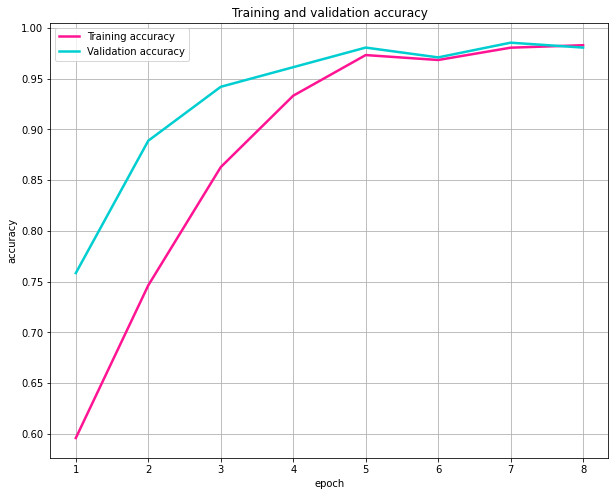

In [13]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(1, epochs+1))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")

In [14]:
print('Accuracy:')
_, accuracy=model.evaluate(X_test, y_test)

Accuracy:
9/9 [==============================] - 0s 41ms/step - loss: 0.0647 - accuracy: 0.9690
